In [1]:
import numpy as np 
import pandas as pd
from urllib import request
import matplotlib.pyplot as plt
import seaborn as sns 
from dateutil.parser import parse
from datetime import date
import calendar

In [2]:
filepath = "./data/Code data_METRONOM.csv"
df = pd.read_csv(filepath, encoding = "ISO-8859-1", error_bad_lines=False, sep="\t")


/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(738671, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738671 entries, 0 to 738670
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   store_id                738671 non-null  int64  
 1   store_desc              738671 non-null  object 
 2   CATMAN_BUY_DOMAIN_ID    738671 non-null  int64  
 3   CATMAN_BUY_DOMAIN_DESC  738671 non-null  object 
 4   PCG_MAIN_CAT_ID         738671 non-null  int64  
 5   PCG_CAT_ID              738671 non-null  int64  
 6   PCG_CAT_DESC            738671 non-null  object 
 7   PCG_SUB_CAT_ID          738671 non-null  int64  
 8   PCG_SUB_CAT_DESC        738671 non-null  object 
 9   ART_NO                  738671 non-null  int64  
 10  ART_NAME                738671 non-null  object 
 11  Bv NNEK                 597 non-null     object 
 12  Bv Stk                  597 non-null     float64
 13  Bestand Ist NNEK        738671 non-null  float64
 14  Bestand Ist Stück   

In [5]:
df.head()

,store_id,store_desc,CATMAN_BUY_DOMAIN_ID,CATMAN_BUY_DOMAIN_DESC,PCG_MAIN_CAT_ID,PCG_CAT_ID,PCG_CAT_DESC,PCG_SUB_CAT_ID,PCG_SUB_CAT_DESC,ART_NO,ART_NAME,Bv NNEK,Bv Stk,Bestand Ist NNEK,Bestand Ist Stück,WA Stück,Umsatz VK Netto,date_of_day,DAY_DESC
0,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,01.01.20,01.01.20 Mit
1,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,02.01.20,02.01.20 Don
2,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,03.01.20,03.01.20 Fre
3,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,04.01.20,04.01.20 Sam
4,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,05.01.20,05.01.20 Son


In [6]:
df.columns.tolist()

['store_id',
 'store_desc',
 'CATMAN_BUY_DOMAIN_ID',
 'CATMAN_BUY_DOMAIN_DESC',
 'PCG_MAIN_CAT_ID',
 'PCG_CAT_ID',
 'PCG_CAT_DESC',
 'PCG_SUB_CAT_ID',
 'PCG_SUB_CAT_DESC',
 'ART_NO',
 'ART_NAME',
 'Bv NNEK',
 'Bv Stk',
 'Bestand Ist NNEK',
 'Bestand Ist Stück',
 'WA Stück',
 'Umsatz VK Netto',
 'date_of_day',
 'DAY_DESC']

In [7]:
df.count()

store_id                  738671
store_desc                738671
CATMAN_BUY_DOMAIN_ID      738671
CATMAN_BUY_DOMAIN_DESC    738671
PCG_MAIN_CAT_ID           738671
PCG_CAT_ID                738671
PCG_CAT_DESC              738671
PCG_SUB_CAT_ID            738671
PCG_SUB_CAT_DESC          738671
ART_NO                    738671
ART_NAME                  738671
Bv NNEK                      597
Bv Stk                       597
Bestand Ist NNEK          738671
Bestand Ist Stück         738671
WA Stück                   14075
Umsatz VK Netto            14075
date_of_day               738671
DAY_DESC                  738671
dtype: int64

In [8]:
df = df.rename(columns={"CATMAN_BUY_DOMAIN_ID": "Purchasing_Area_ID",
                        "CATMAN_BUY_DOMAIN_DESC": "Purchasing_Area_Description",
                        "PCG_MAIN_CAT_ID": "Main_Product_Group_ID",
                        "PCG_MAIN_CAT_DESC": "Main_Product_Group_Description",
                        "PCG_SUB_CAT_ID": "Product_Subgroup_Category_ID",
                        "PCG_SUB_CAT_DESC": "Product_Subgroup_Category_Description",
                        "PCG_CAT_ID": "Product_Group_Category_ID",
                        "PCG_CAT_DESC": "Product_Group_Category_Description",
                    "Bv NNEK" : "Monthly_Shrinkage_in_Euros",
                   "Bv Stk" : "Monthly_Shrinkage_in_Pieces",
                   "WA Stück" : "Sales_in_Pieces",
                   "Umsatz VK Netto" : "Sales_in_Euros",
                   "Bestand Ist NNEK" : "Average_Stocks_in_Euros_per_Day",
                   "Bestand Ist Stück" : "Average_Stocks_per_Day"})

df.head()

,store_id,store_desc,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Average_Stocks_in_Euros_per_Day,Average_Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,DAY_DESC
0,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,01.01.20,01.01.20 Mit
1,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,02.01.20,02.01.20 Don
2,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,03.01.20,03.01.20 Fre
3,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,04.01.20,04.01.20 Sam
4,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,05.01.20,05.01.20 Son


what are we trying to predict here ? 
the monthly shrinkage. "Monthly Shrinkage in euros" or "Monthly Shrinkage in pieces" should be our label set.  

Will drop all the rows that has missing shrinkage information.

In [9]:
df = df.dropna(subset=["Monthly_Shrinkage_in_Euros", "Monthly_Shrinkage_in_Pieces"])

In [10]:
df.count()

store_id                                 597
store_desc                               597
Purchasing_Area_ID                       597
Purchasing_Area_Description              597
Main_Product_Group_ID                    597
Product_Group_Category_ID                597
Product_Group_Category_Description       597
Product_Subgroup_Category_ID             597
Product_Subgroup_Category_Description    597
ART_NO                                   597
ART_NAME                                 597
Monthly_Shrinkage_in_Euros               597
Monthly_Shrinkage_in_Pieces              597
Average_Stocks_in_Euros_per_Day          597
Average_Stocks_per_Day                   597
Sales_in_Pieces                          266
Sales_in_Euros                           266
date_of_day                              597
DAY_DESC                                 597
dtype: int64

In [11]:
df.head()

,store_id,store_desc,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Average_Stocks_in_Euros_per_Day,Average_Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,DAY_DESC
9317,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-1,1162",-2.0,63.0,112.0,25.0,18.0,08.01.20,08.01.20 Mit
9329,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-33,486",-60.0,47.0,85.0,89.0,61.0,20.01.20,20.01.20 Mon
9331,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-0,5581",-1.0,78.0,140.0,69.0,45.0,22.01.20,22.01.20 Mit
9340,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-1,1162",-2.0,102.0,182.0,16.0,12.0,31.01.20,31.01.20 Fre
9342,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,"-8,3632",-16.0,25.0,48.0,5.0,4.0,02.01.20,02.01.20 Don


We won't need store_id, and store_desc as it's all the same, so will drop those columns.

In [12]:
df = df.drop(['store_id','store_desc','DAY_DESC'], axis = 1)
df

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Average_Stocks_in_Euros_per_Day,Average_Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-1,1162",-2.0,63.0,112.0,25.0,18.0,08.01.20
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-33,486",-60.0,47.0,85.0,89.0,61.0,20.01.20
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-0,5581",-1.0,78.0,140.0,69.0,45.0,22.01.20
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-1,1162",-2.0,102.0,182.0,16.0,12.0,31.01.20
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,"-8,3632",-16.0,25.0,48.0,5.0,4.0,02.01.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,"-7,3845",-3.0,25.0,10.0,NaN,NaN,29.01.20
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,"-107,1636",-12.0,0.0,0.0,NaN,NaN,21.01.20
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,"-237,9808",-31.0,31.0,4.0,4.0,36.0,07.01.20
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,"-25,333",-5.0,41.0,8.0,1.0,5.0,07.01.20


We can see that for "Bv NNEK"(Monthly shrinkage in euros) they are using commas and other columns such as "Bv Stk"(Monthly shrinkage in pieces) are using periods. We will change the commas to period so we can work with them properly.

In [13]:
df["Monthly_Shrinkage_in_Euros"].replace(',','.',inplace = True, regex = True)

In [14]:
df.head()

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Average_Stocks_in_Euros_per_Day,Average_Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,08.01.20
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.486,-60.0,47.0,85.0,89.0,61.0,20.01.20
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,22.01.20
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,31.01.20
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,02.01.20


In [15]:
df.dtypes

Purchasing_Area_ID                         int64
Purchasing_Area_Description               object
Main_Product_Group_ID                      int64
Product_Group_Category_ID                  int64
Product_Group_Category_Description        object
Product_Subgroup_Category_ID               int64
Product_Subgroup_Category_Description     object
ART_NO                                     int64
ART_NAME                                  object
Monthly_Shrinkage_in_Euros                object
Monthly_Shrinkage_in_Pieces              float64
Average_Stocks_in_Euros_per_Day          float64
Average_Stocks_per_Day                   float64
Sales_in_Pieces                          float64
Sales_in_Euros                           float64
date_of_day                               object
dtype: object

Monthly Shrinkage in euros should be numerical value but it's stored as object types. We need to convert these into numeric types.

In [16]:
df[["Monthly_Shrinkage_in_Euros"]] = df[["Monthly_Shrinkage_in_Euros"]].apply(pd.to_numeric)

In [17]:
df.dtypes

Purchasing_Area_ID                         int64
Purchasing_Area_Description               object
Main_Product_Group_ID                      int64
Product_Group_Category_ID                  int64
Product_Group_Category_Description        object
Product_Subgroup_Category_ID               int64
Product_Subgroup_Category_Description     object
ART_NO                                     int64
ART_NAME                                  object
Monthly_Shrinkage_in_Euros               float64
Monthly_Shrinkage_in_Pieces              float64
Average_Stocks_in_Euros_per_Day          float64
Average_Stocks_per_Day                   float64
Sales_in_Pieces                          float64
Sales_in_Euros                           float64
date_of_day                               object
dtype: object

We will change the data type of "date_of_day" to date here.
First we need to change the format of the dates.

In [ ]:
#duplicatedRows = df[df.duplicated(['ART_NAME'])]
#duplicatedRows

In [19]:
df["date_of_day"] = pd.to_datetime(df["date_of_day"], format = "%d.%m.%y")
df

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Average_Stocks_in_Euros_per_Day,Average_Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,-7.3845,-3.0,25.0,10.0,NaN,NaN,2020-01-29
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,-107.1636,-12.0,0.0,0.0,NaN,NaN,2020-01-21
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,-237.9808,-31.0,31.0,4.0,4.0,36.0,2020-01-07
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,-25.3330,-5.0,41.0,8.0,1.0,5.0,2020-01-07


In [20]:
#store index of weekdays into "weekday_number"
df["weekday_number"] = df["date_of_day"].dt.dayofweek
df

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Average_Stocks_in_Euros_per_Day,Average_Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,weekday_number
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08,2
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20,0
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22,2
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31,4
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,-7.3845,-3.0,25.0,10.0,NaN,NaN,2020-01-29,2
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,-107.1636,-12.0,0.0,0.0,NaN,NaN,2020-01-21,1
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,-237.9808,-31.0,31.0,4.0,4.0,36.0,2020-01-07,1
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,-25.3330,-5.0,41.0,8.0,1.0,5.0,2020-01-07,1


In [21]:
df["weekday"] = df["weekday_number"].apply(lambda x: calendar.day_name[x])
df

,Purchasing_Area_ID,Purchasing_Area_Description,Main_Product_Group_ID,Product_Group_Category_ID,Product_Group_Category_Description,Product_Subgroup_Category_ID,Product_Subgroup_Category_Description,ART_NO,ART_NAME,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Average_Stocks_in_Euros_per_Day,Average_Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,date_of_day,weekday_number,weekday
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08,2,Wednesday
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20,0,Monday
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22,2,Wednesday
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31,4,Friday
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,-7.3845,-3.0,25.0,10.0,NaN,NaN,2020-01-29,2,Wednesday
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,-107.1636,-12.0,0.0,0.0,NaN,NaN,2020-01-21,1,Tuesday
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,-237.9808,-31.0,31.0,4.0,4.0,36.0,2020-01-07,1,Tuesday
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,-25.3330,-5.0,41.0,8.0,1.0,5.0,2020-01-07,1,Tuesday


We will change the data type of weekday from object to category.

In [22]:
df['weekday'] = df['weekday'].astype('category')

Lastly, we will change the data type of all the categorical columns such as 'Purchasing_Area_ID', 'Purchasing_Area_Description', 'Main_Product_Group_ID', 'Product_Group_Category_ID', 'Product_Group_Category_Description', 'Product_Subgroup_Category_ID', 'Product_Subgroup_Category_Description', 'ART_NO', 'ART_NAME' from object to category.  


In [28]:
for col in ['Purchasing_Area_ID', 'Purchasing_Area_Description', 'Main_Product_Group_ID', 'Product_Group_Category_ID', 'Product_Group_Category_Description', 'Product_Subgroup_Category_ID', 'Product_Subgroup_Category_Description', 'ART_NO', 'ART_NAME']:
    df[col] = df[col].astype('category')
df.dtypes

Purchasing_Area_ID                             category
Purchasing_Area_Description                    category
Main_Product_Group_ID                          category
Product_Group_Category_ID                      category
Product_Group_Category_Description             category
Product_Subgroup_Category_ID                   category
Product_Subgroup_Category_Description          category
ART_NO                                         category
ART_NAME                                       category
Monthly_Shrinkage_in_Euros                      float64
Monthly_Shrinkage_in_Pieces                     float64
Average_Stocks_in_Euros_per_Day                 float64
Average_Stocks_per_Day                          float64
Sales_in_Pieces                                 float64
Sales_in_Euros                                  float64
date_of_day                              datetime64[ns]
weekday_number                                    int64
weekday                                        c

# Exploring the Data

In [31]:
df.groupby("Purchasing_Area_Description")["Monthly_Shrinkage_in_Euros"].sum()

Purchasing_Area_Description
ACM BACKWAREN           -199.9313
ACM FEINKOST           -3349.8030
ACM FLEISCH            -1933.8055
ACM FRISCHFISCH        -1180.6201
ACM GEMUESE            -2400.3624
ACM KAESE              -3674.9991
ACM MOLKEREIPRODUKTE   -4317.8502
ACM OBST                -230.1300
ACM WURST              -5103.6281
Name: Monthly_Shrinkage_in_Euros, dtype: float64

In [32]:
df.groupby("Purchasing_Area_Description").sum()

,Monthly_Shrinkage_in_Euros,Monthly_Shrinkage_in_Pieces,Average_Stocks_in_Euros_per_Day,Average_Stocks_per_Day,Sales_in_Pieces,Sales_in_Euros,weekday_number
Purchasing_Area_Description,,,,,,,
ACM BACKWAREN,-199.9313,-208.0,1253.000,1125.000,328.00,295.0,61
ACM FEINKOST,-3349.8030,-742.0,3530.000,974.000,136.00,544.0,204
ACM FLEISCH,-1933.8055,-2.0,6993.027,26.000,0.00,2934.0,149
ACM FRISCHFISCH,-1180.6201,-189.0,683.000,150.000,197.00,752.0,42
ACM GEMUESE,-2400.3624,-855.0,4347.361,2060.000,888.00,3366.0,106
ACM KAESE,-3674.9991,-1238.0,7291.993,3522.440,298.00,1052.0,212
ACM MOLKEREIPRODUKTE,-4317.8502,-4632.0,14675.214,7579.439,3508.44,5138.0,338
ACM OBST,-230.1300,-87.0,291.000,89.000,123.00,364.0,11
ACM WURST,-5103.6281,-998.0,7651.000,2044.000,188.00,1112.0,415


#Count how many rows each day of week has. (Return the frequency of each unique value in "weekday" column)

In [40]:
df.groupby("weekday").size()

weekday
Friday       254
Monday        84
Sunday         1
Thursday      90
Tuesday       90
Wednesday     78
dtype: int64

In [39]:
df.groupby("weekday")["Monthly_Shrinkage_in_Euros"].sum()

weekday
Friday      -9554.6797
Monday      -2845.6327
Sunday         -1.2144
Thursday    -3442.5240
Tuesday     -3749.3746
Wednesday   -2797.7043
Name: Monthly_Shrinkage_in_Euros, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

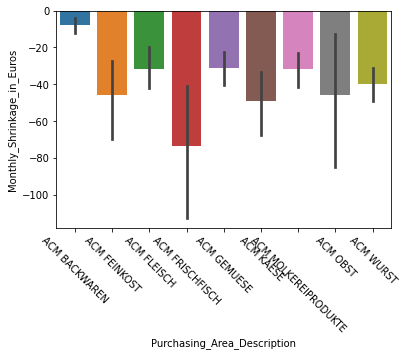

In [33]:
sns.barplot(data = df, x = "Purchasing_Area_Description", y = "Monthly_Shrinkage_in_Euros")
plt.xticks(rotation=-45)

In [34]:
df.groupby("Purchasing_Area_Description")["Monthly_Shrinkage_in_Pieces"].mean()

Purchasing_Area_Description
ACM BACKWAREN           -8.000000
ACM FEINKOST           -10.164384
ACM FLEISCH             -0.032787
ACM FRISCHFISCH        -11.812500
ACM GEMUESE            -11.103896
ACM KAESE              -16.506667
ACM MOLKEREIPRODUKTE   -34.058824
ACM OBST               -17.400000
ACM WURST               -7.796875
Name: Monthly_Shrinkage_in_Pieces, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

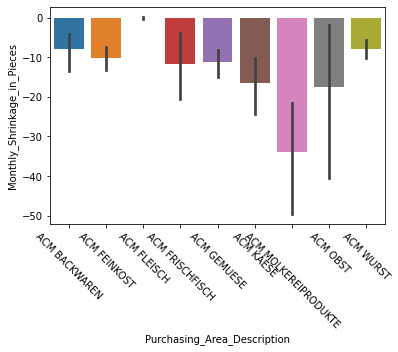

In [35]:
sns.barplot(data = df, x = "Purchasing_Area_Description", y = "Monthly_Shrinkage_in_Pieces")
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

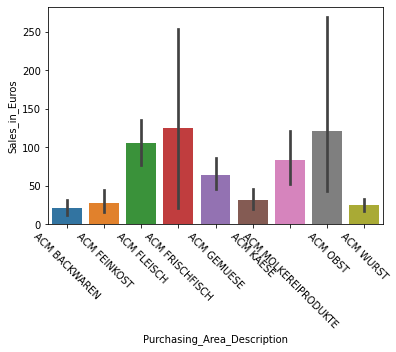

In [36]:
sns.barplot(data = df, x = "Purchasing_Area_Description", y = "Sales_in_Euros")
plt.xticks(rotation=-45)

In [37]:
sorted([(col, df[col].unique().size) for col in df.columns.values], key=lambda tup: tup[1], reverse=True)

[('Monthly_Shrinkage_in_Euros', 572),
 ('ART_NO', 413),
 ('ART_NAME', 411),
 ('Average_Stocks_in_Euros_per_Day', 234),
 ('Product_Subgroup_Category_Description', 190),
 ('Average_Stocks_per_Day', 138),
 ('Sales_in_Euros', 114),
 ('Product_Group_Category_Description', 78),
 ('Monthly_Shrinkage_in_Pieces', 71),
 ('Sales_in_Pieces', 59),
 ('Product_Subgroup_Category_ID', 40),
 ('Product_Group_Category_ID', 29),
 ('Main_Product_Group_ID', 24),
 ('date_of_day', 22),
 ('Purchasing_Area_ID', 9),
 ('Purchasing_Area_Description', 9),
 ('weekday_number', 6),
 ('weekday', 6)]